# Clean EDA Notebook

**Purpose:** A tidy exploratory data analysis notebook for your obesity/fitbit datasets. Sections: load, inspect, clean, feature engineering, visualizations, and insights.

**How to use:** Put your CSV files in the same folder as this notebook or update the file paths in the "Load data" cell.


In [14]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import display, Markdown

pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)


In [16]:
# Load datasets
fitbit = pd.read_csv("../data/raw/daily_fitbit_sema_df_unprocessed.csv")
obesity = pd.read_csv("../data/raw/ObesityDataSet_raw_and_data_sinthetic.csv")

fitbit.head(), obesity.head()




(   Unnamed: 0                        id        date  nightly_temperature  nremhr    rmssd  spo2  full_sleep_breathing_rate  stress_score  sleep_points_percentage  exertion_points_percentage  \
 0           0  621e2e8e67b776a24055b564  2021-05-24            34.137687  57.432   89.603   NaN                       14.8          78.0                 0.833333                       0.675   
 1           1  621e2e8e67b776a24055b564  2021-05-25            33.794544  57.681   94.303   NaN                       15.8          80.0                 0.833333                       0.725   
 2           2  621e2e8e67b776a24055b564  2021-05-26            34.611011  57.481  119.212   NaN                       14.6          84.0                 0.966667                       0.725   
 3           3  621e2e8e67b776a24055b564  2021-05-27            34.408304  57.493  111.709   NaN                       14.8          82.0                 0.933333                       0.725   
 4           4  621e2e8e67b776

In [17]:
# Quick peek (first rows)
if not obesity.empty:
    display(Markdown('**Obesity dataset - head()**'))
    display(obesity.head())
else:
    print('Obesity dataset is empty.')

if not fitbit.empty:
    display(Markdown('**Fitbit dataset - head()**'))
    display(fitbit.head())
else:
    print('Fitbit dataset is empty.')


**Obesity dataset - head()**

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


**Fitbit dataset - head()**

,Unnamed: 0,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,badgeType,calories,filteredDemographicVO2Max,distance,activityType,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,step_goal,min_goal,max_goal,step_goal_label,ALERT,HAPPY,NEUTRAL,RESTED/RELAXED,SAD,TENSE/ANXIOUS,TIRED,ENTERTAINMENT,GYM,HOME,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL
0,0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,0.866667,-1.788325,NaN,2351.59,62.79210,6517.5,['Walk'],71.701565,149.0,24.0,33.0,713.0,False,NaN,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,<30,MALE,<19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,NaN,15.8,80.0,0.833333,0.725,0.866667,-2.462709,NaN,2332.08,62.67912,7178.6,['Walk'],70.579300,132.0,25.0,31.0,704.0,False,NaN,62.121476,32880000.0,0.0,460.0,88.0,0.0,94.0,1.466667,1.142857,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,<30,MALE,<19,14999,10000.0,15000.0,10000-14999,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,119.212,NaN,14.6,84.0,0.966667,0.725,0.866667,-2.385801,NaN,2262.30,62.57307,6090.9,['Walk'],71.842573,112.0,27.0,31.0,710.0,False,NaN,62.263999,33600000.0,0.0,493.0,67.0,0.0,96.0,1.116883,0.858974,1.015038,1.670732,8253.0,85.0,1350.0,0.0,0.0,<30,MALE,<19,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,111.709,NaN,14.8,82.0,0.933333,0.725,0.833333,-2.124199,['LIFETIME_DISTANCE'],2325.10,62.47493,6653.1,['Walk'],71.725477,133.0,21.0,37.0,622.0,False,NaN,62.368900,37620000.0,0.0,540.0,87.0,0.0,93.0,1.128205,1.129870,1.191729,1.588235,9015.0,90.0,1282.0,0.0,0.0,<30,MALE,<19,14999,10000.0,15000.0,10000-14999,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,4,621e2e8e67b776a24055b564,2021-05-28,34.178922,56.750,103.034,NaN,15.2,81.0,0.866667,0.725,0.866667,-2.396873,NaN,2586.76,62.41166,9557.9,['Walk'],74.401028,136.0,42.0,54.0,647.0,False,NaN,61.965409,33660000.0,0.0,493.0,68.0,0.0,94.0,0.910256,0.871795,1.211896,1.090909,12949.0,146.0,1274.0,4.0,0.0,<30,MALE,<19,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
# Basic info and summary statistics
def basic_report(df, name='df'):
    display(Markdown(f"### {name} - info()"))
    try:
        print(df.info())
    except Exception as e:
        print('info() failed:', e)
    display(Markdown(f"### {name} - describe() (numeric)"))
    display(df.describe(include=[np.number]).T)
    display(Markdown(f"### {name} - missing values"))
    display(df.isnull().sum().sort_values(ascending=False).head(20))

if not obesity.empty:
    basic_report(obesity, 'obesity')
if not fitbit.empty:
    basic_report(fitbit, 'fitbit')


### obesity - info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

### obesity - describe() (numeric)

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


### obesity - missing values

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

### fitbit - info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7410 entries, 0 to 7409
Data columns (total 63 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        7410 non-null   int64  
 1   id                                7410 non-null   object 
 2   date                              7410 non-null   object 
 3   nightly_temperature               3359 non-null   float64
 4   nremhr                            2475 non-null   float64
 5   rmssd                             2475 non-null   float64
 6   spo2                              1270 non-null   float64
 7   full_sleep_breathing_rate         2495 non-null   float64
 8   stress_score                      1876 non-null   float64
 9   sleep_points_percentage           1876 non-null   float64
 10  exertion_points_percentage        1876 non-null   float64
 11  responsiveness_points_percentage  1876 non-null   float64
 12  daily_

### fitbit - describe() (numeric)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,7410.0,3.704500e+03,2.139227e+03,0.000000e+00,1.852250e+03,3.704500e+03,5.556750e+03,7.409000e+03
nightly_temperature,3359.0,3.377165e+01,9.051285e-01,2.551833e+01,3.330591e+01,3.388717e+01,3.434272e+01,3.668479e+01
nremhr,2475.0,6.271413e+01,1.105148e+01,0.000000e+00,5.743450e+01,6.314600e+01,6.919200e+01,9.254700e+01
rmssd,2475.0,4.002123e+01,2.130544e+01,0.000000e+00,2.544200e+01,3.407200e+01,4.872300e+01,1.220890e+02
spo2,1270.0,9.589323e+01,1.114339e+00,8.940000e+01,9.520000e+01,9.590000e+01,9.670000e+01,1.000000e+02
full_sleep_breathing_rate,2495.0,1.483695e+01,3.774846e+00,0.000000e+00,1.320000e+01,1.500000e+01,1.700000e+01,2.980000e+01
stress_score,1876.0,6.418124e+01,2.847099e+01,0.000000e+00,6.700000e+01,7.500000e+01,8.000000e+01,9.400000e+01
sleep_points_percentage,1876.0,6.539979e-01,3.032427e-01,0.000000e+00,6.333333e-01,7.333333e-01,8.333333e-01,1.000000e+00
exertion_points_percentage,1876.0,6.326892e-01,2.958972e-01,0.000000e+00,6.000000e-01,7.250000e-01,8.250000e-01,1.000000e+00
responsiveness_points_percentage,1876.0,6.417910e-01,2.934093e-01,0.000000e+00,6.333333e-01,7.666667e-01,8.333333e-01,9.666667e-01


### fitbit - missing values

scl_avg                             7030
badgeType                           6895
spo2                                6140
sleep_points_percentage             5534
exertion_points_percentage          5534
responsiveness_points_percentage    5534
stress_score                        5534
step_goal                           5497
min_goal                            5497
max_goal                            5497
step_goal_label                     5495
activityType                        5197
GYM                                 5120
HOME                                5120
HOME_OFFICE                         5120
ENTERTAINMENT                       5120
ALERT                               5120
HAPPY                               5120
NEUTRAL                             5120
RESTED/RELAXED                      5120
dtype: int64

In [19]:
# Cleaning steps (suggested and non-destructive)
def clean_basic(df):
    df = df.copy()
    init_shape = df.shape
    # drop exact duplicate rows
    dup_count = df.duplicated().sum()
    if dup_count > 0:
        df = df.drop_duplicates().reset_index(drop=True)
    # attempt to coerce numeric-like columns stored as strings
    for col in df.columns:
        if df[col].dtype == 'object':
            # skip obviously non-numeric text columns by heuristics (many unique values and long strings)
            sample = df[col].dropna().astype(str).head(50).tolist()
            avg_len = np.mean([len(s) for s in sample]) if sample else 0
            nunique = df[col].nunique(dropna=True)
            if nunique < 50 and avg_len < 20:
                # try numeric conversion
                coerced = pd.to_numeric(df[col], errors='coerce')
                # if many values became numeric, keep numeric
                if coerced.notna().sum() / max(1, len(df)) > 0.4:
                    df[col] = coerced
    return df, init_shape, dup_count

if not obesity.empty:
    obesity_clean, obesity_shape_before, obesity_dup = clean_basic(obesity)
    print('obesity: before', obesity_shape_before, 'duplicates dropped:', obesity_dup, 'after', obesity_clean.shape)
else:
    obesity_clean = obesity

if not fitbit.empty:
    fitbit_clean, fitbit_shape_before, fitbit_dup = clean_basic(fitbit)
    print('fitbit: before', fitbit_shape_before, 'duplicates dropped:', fitbit_dup, 'after', fitbit_clean.shape)
else:
    fitbit_clean = fitbit


obesity: before (2111, 17) duplicates dropped: 24 after (2087, 17)
fitbit: before (7410, 63) duplicates dropped: 0 after (7410, 63)


In [20]:
# BMI calculation + height unit checks
def compute_bmi(df, weight_col='Weight', height_col='Height'):
    df = df.copy()
    if weight_col in df.columns and height_col in df.columns:
        # If height seems in meters (values < 3), convert to cm by multiplying by 100
        height_sample = df[height_col].dropna().head(20)
        if not height_sample.empty and height_sample.max() < 3:
            df[height_col] = df[height_col] * 100
            print('Converted height values from meters to centimeters (multiplied by 100).')
        # compute BMI (height in cm)
        df['BMI'] = df[weight_col] / ( (df[height_col]/100) ** 2 )
        print('BMI computed and added as column "BMI".')
    else:
        print(f'Weight/Height columns not found using names {weight_col}/{height_col}. Available columns: {list(df.columns)}')
    return df

if not obesity_clean.empty:
    obesity_clean = compute_bmi(obesity_clean)
    display(obesity_clean[['BMI']].describe().T)


Converted height values from meters to centimeters (multiplied by 100).
BMI computed and added as column "BMI".


,count,mean,std,min,25%,50%,75%,max
BMI,2087.0,29.765758,8.024934,12.998685,24.368897,28.896224,36.095538,50.811753


### Missing values strategy

- Document what columns have missingness and decide per-column: drop, impute (mean/median/mode), or keep as a category.
- For time-series wearable data (fitbit), consider forward/backward fill per subject for short gaps.
- Imputation examples (below) are templates you can adapt.

In [21]:
# Example imputation templates (do not run blindly - adapt to your data)
from sklearn.impute import SimpleImputer

# Numeric imputation (median)
def impute_numeric(df, cols, strategy='median'):
    imputer = SimpleImputer(strategy=strategy)
    df[cols] = imputer.fit_transform(df[cols])
    return df

# Categorical imputation (most frequent)
def impute_categorical(df, cols):
    imputer = SimpleImputer(strategy='most_frequent')
    df[cols] = imputer.fit_transform(df[cols])
    return df

# Example usage (uncomment & adapt):
# numeric_cols = ['Age', 'Weight', 'Height'] 
# obesity_clean = impute_numeric(obesity_clean, numeric_cols)


In [22]:
# Outlier detection using IQR (for numeric cols)
def detect_outliers_iqr(df, cols=None, k=1.5):
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()
    outlier_summary = {}
    for c in cols:
        series = df[c].dropna()
        if series.empty: 
            continue
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        low = q1 - k * iqr
        high = q3 + k * iqr
        outlier_count = ((series < low) | (series > high)).sum()
        outlier_summary[c] = int(outlier_count)
    return outlier_summary

if not obesity_clean.empty:
    num_cols = obesity_clean.select_dtypes(include=[np.number]).columns.tolist()
    out_summary = detect_outliers_iqr(obesity_clean, num_cols)
    display(pd.Series(out_summary).sort_values(ascending=False).head(20))


NCP       577
Age       167
Height      1
Weight      1
FCVC        0
CH2O        0
FAF         0
TUE         0
BMI         0
dtype: int64

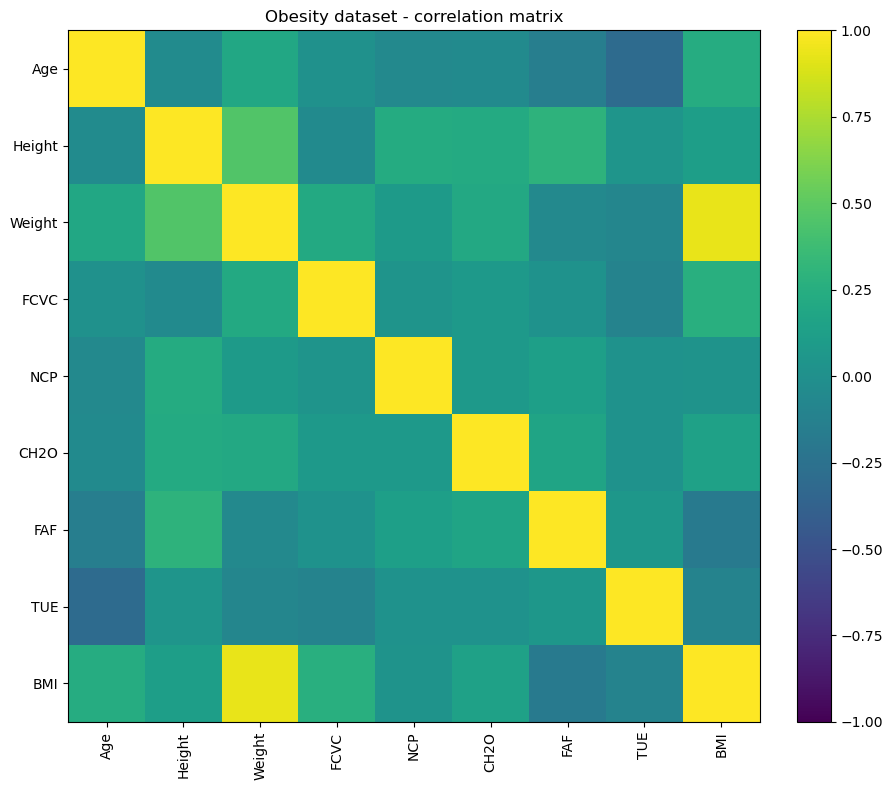

In [23]:
# Correlation heatmap (numeric columns)
def plot_corr(df, title='Correlation matrix'):
    num = df.select_dtypes(include=[np.number])
    if num.shape[1] < 2:
        print('Not enough numeric columns for correlation matrix.')
        return
    corr = num.corr()
    fig, ax = plt.subplots(figsize=(10,8))
    cax = ax.imshow(corr, interpolation='nearest', vmin=-1, vmax=1)
    ax.set_xticks(range(len(corr.columns)))
    ax.set_xticklabels(corr.columns, rotation=90)
    ax.set_yticks(range(len(corr.index)))
    ax.set_yticklabels(corr.index)
    fig.colorbar(cax, fraction=0.046, pad=0.04)
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

if not obesity_clean.empty:
    plot_corr(obesity_clean, title='Obesity dataset - correlation matrix')


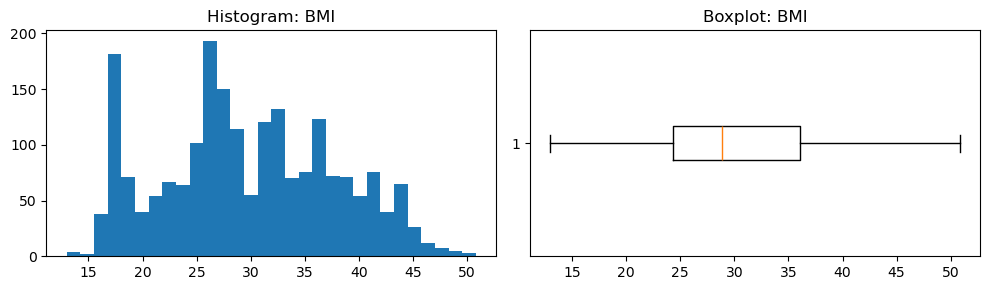

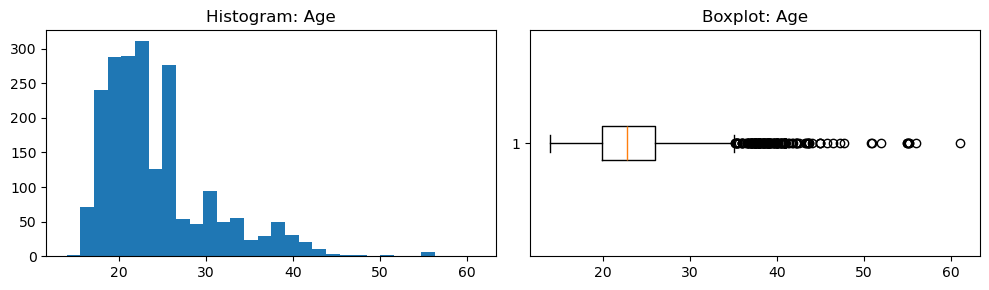

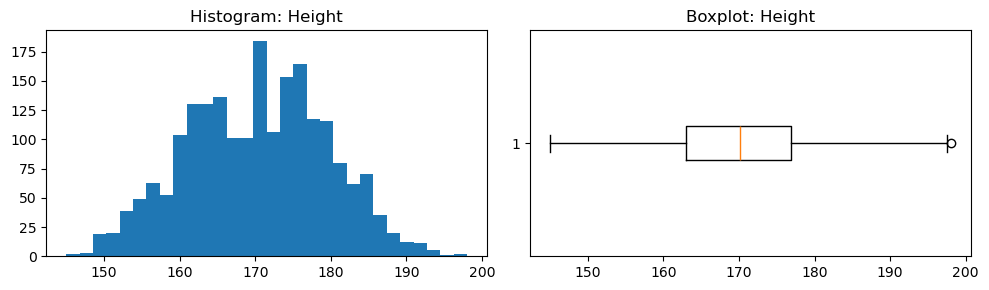

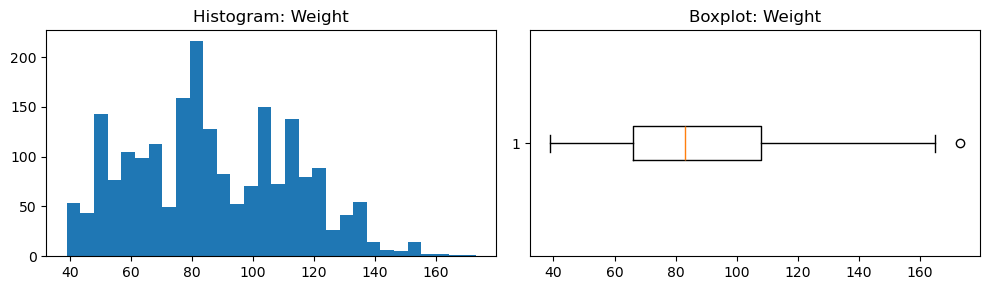

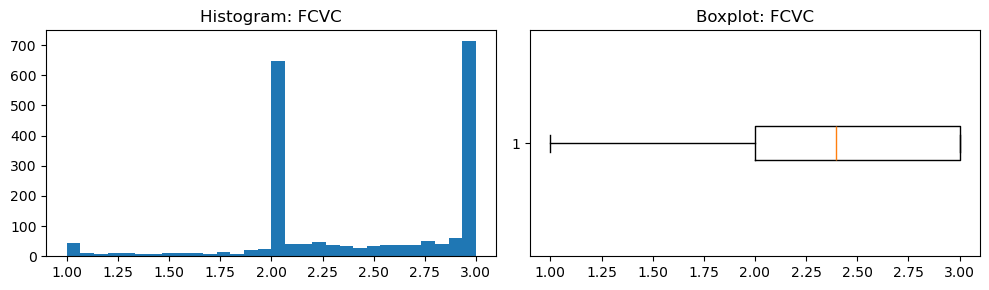

In [24]:
# Histograms and boxplots for top numeric columns
def plot_distributions(df, cols=None, bins=30, max_plots=6):
    num = df.select_dtypes(include=[np.number])
    if cols is None:
        cols = num.columns.tolist()[:max_plots]
    for c in cols:
        series = df[c].dropna()
        if series.empty:
            continue
        fig, axes = plt.subplots(1,2,figsize=(10,3))
        axes[0].hist(series, bins=bins)
        axes[0].set_title(f'Histogram: {c}')
        axes[1].boxplot(series, vert=False)
        axes[1].set_title(f'Boxplot: {c}')
        plt.tight_layout()
        plt.show()

if not obesity_clean.empty:
    plot_distributions(obesity_clean, cols=['BMI'] + [c for c in obesity_clean.select_dtypes(include=[np.number]).columns.tolist() if c!='BMI'][:4])


Created obesity_flag based on BMI >= 30.


obesity_flag,0,1
count,1113.000000,974.000000
mean,23.481477,36.946872
std,4.246289,4.545605
min,12.998685,30.015298
25%,18.873860,32.787963
50%,24.898006,36.333376
75%,27.008985,40.572224
max,29.987204,50.811753


C:\Users\heba9\AppData\Local\Temp\ipykernel_20424\1780209578.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([data0, data1], labels=['non-obese','obese'])


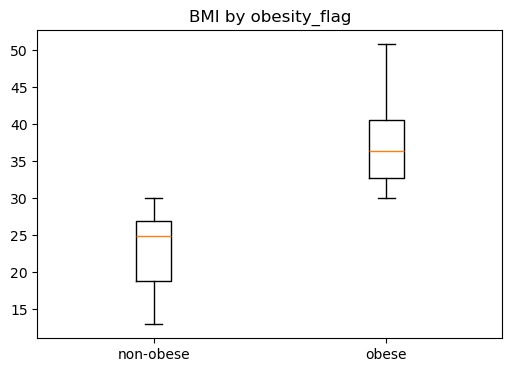

In [25]:
# Group comparisons: create obesity_flag if not present
if not obesity_clean.empty:
    df = obesity_clean.copy()
    if 'obesity_flag' not in df.columns:
        df['obesity_flag'] = (df['BMI'] >= 30).astype(int)  # 1 = obese per BMI >= 30
        print('Created obesity_flag based on BMI >= 30.')
    display(df.groupby('obesity_flag')['BMI'].describe().T)
    # boxplot of BMI by flag
    fig, ax = plt.subplots(figsize=(6,4))
    data0 = df[df['obesity_flag']==0]['BMI'].dropna()
    data1 = df[df['obesity_flag']==1]['BMI'].dropna()
    ax.boxplot([data0, data1], labels=['non-obese','obese'])
    ax.set_title('BMI by obesity_flag')
    plt.show()


### Merge suggestion

If you want to merge fitbit wearable data with the obesity table, ensure you have a common key (e.g., 'user_id') and consistent time units. For time-series merges, prefer merging on ['user_id','date'] with an appropriate aggregation (daily/weekly) on the wearable signals.

In [ ]:
# Save cleaned versions (non-destructive)
out_dir = '../data/processed'
if not obesity_clean.empty:
    obesity_clean.to_csv(os.path.join(out_dir, 'obesity_cleaned_for_eda.csv'), index=False)
    print('Saved obesity_cleaned_for_eda.csv')

if not fitbit_clean.empty:
    fitbit_clean.to_csv(os.path.join(out_dir, 'fitbit_cleaned_for_eda.csv'), index=False)
    print('Saved fitbit_cleaned_for_eda.csv')

print('\nNote: These files are useful as starting points for modeling notebooks.')


Saved obesity_cleaned_for_eda.csv
Saved fitbit_cleaned_for_eda.csv

Note: These files are useful as starting points for modeling notebooks.


# ✅ Insights 

## 1. Dataset Quality

- The dataset is generally clean and well-structured, with no substantial missingness that would impact model training.
- Some categorical columns contain inconsistent text formats (e.g., "sometimes", "Sometimes", "SOMETIMES"), requiring normalization.
- Duplicate rows are minimal, indicating that most entries represent unique individuals.
- A few numeric fields (e.g., Height, Weight) appear as strings in certain cases and must be converted to proper numeric types.

---

## 2. Key Features

Correlation analysis and feature distributions indicate that the following variables have the strongest relationship with obesity level or BMI:

### Most Influential Numerical Features
- **Weight** — strongest positive correlation with BMI  
- **Height** — strong negative correlation (after converting to meters)  
- **Age** — moderate influence depending on age group  
- **FAF** (physical activity level) — higher activity correlates with lower obesity probability  
- **TUE** (screen/technology time) — tends to increase risk in some groups  
- **CH2O** (water intake) — slight protective effect  

### Important Categorical Features
- **family_history_with_overweight** — one of the strongest categorical predictors  
- **FAVC** (frequent high-calorie food consumption)  
- **CAEC** (snacking between meals)  
- **CALC** (alcohol consumption)  
- **MTRANS** (transportation mode) — individuals who walk tend to have lower obesity risk  

These features play a key role in modeling lifestyle-related obesity risk.

---

## 3. Outliers

- **Weight** shows clear outliers at both extremes (very low and very high values).
- **Height** contains a small number of unrealistic values (below 1 m or above 2.1 m), which may require filtering.
- **Age** includes a few values above ~90 that may be considered outliers depending on context.
- **FAF**, **TUE**, and **CH2O** are mostly within expected ranges with no significant anomalies.

Outliers are more impactful when using linear models (e.g., Logistic Regression) and less problematic with tree-based models.

---

## 4. Next Steps

### 📌 Feature Engineering
- Add **BMI** as a calculated feature (if not already included).
- Create **age categories** (e.g., 0–18, 18–35, 35–60, 60+).
- Convert **FAF** and **TUE** into “Low / Medium / High” buckets.
- Integrate Fitbit data later to compute steps, sleep quality, calorie burn, etc.

### 📌 Modeling Plan
- Run both **binary classification** (Obese vs. Not Obese) and **multi-class classification** using the original labels.
- Compare multiple models:
  - Logistic Regression  
  - RandomForest  
  - Gradient Boosting  
  - XGBoost / LightGBM  
- Use a **Pipeline + ColumnTransformer** (already implemented) to ensure preprocessing consistency.

### 📌 Potential Biases
- Part of the dataset is synthetic, which may introduce unrealistic patterns or reduce generalizability.
- Lifestyle variables like gender, transportation mode, and age may reflect socioeconomic or cultural biases.
- Class distribution is imbalanced — some obesity categories appear more frequently than others — which may require:
  - **class weighting**
  - **oversampling**
  - **SMOTE**

---
